In [53]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
from datetime import datetime, timedelta
from scipy import integrate, optimize, interpolate, stats
from matplotlib.colors import LogNorm
from random import randint
import csv


In [88]:
# read data
def read_data(filename):
    left_headphone = np.array([])
    right_headphone = np.array([])
    with open(filename, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
        for row in reader:
            n1, n2 = (float(s) for s in row[0].split(','))
            left_headphone = np.append(left_headphone, n1)
            right_headphone = np.append(right_headphone, n2)   
    left_x = np.linspace(0, max(left_headphone), len(left_headphone))
    right_x = np.linspace(0, max(right_headphone), len(right_headphone))
    
    return left_x, left_headphone, right_x, right_headphone

# fit data
def model(t, A, B, C, D, E, F, G, H, I, J, K, w, L, M, N, O, P, Q):
    return (A*np.cos(w*t) + B*np.sin(w*t) + C*np.cos(2*w*t) + D*np.sin(2*w*t)+ E*np.cos(3*w*t) 
            + F*np.sin(3*w*t) + G*np.cos(4*w*t) + H*np.sin(4*w*t) + I*np.cos(5*w*t) + J*np.sin(5*w*t) 
            + L*np.cos(6*w*t) + M*np.sin(6*w*t) + N*np.cos(7*w*t) + O*np.sin(7*w*t) + P*np.cos(8*w*t) 
            + Q*np.sin(8*w*t) + K)

def fit(x, y, w_guess):
    par0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, w_guess, 1, 1, 1, 1, 1, 1]
    par,cov= optimize.curve_fit(model, x, y, p0 = par0, maxfev = 10000000) 
    A, B, C, D, E, F, G, H, I, J, K, w, L, M, N, O, P, Q = par[0], par[1], par[2], par[3], par[4], par[5], 
    par[6], par[7], par[8], par[9], par[10], par[11], par[12], par[13], par[14], par[15], par[16], par[17]
    fit = model(x, A, B, C, D, E, F, G, H, I, J, K, w, L, M, N, O, P, Q)
    print("the parameters are: ", par)
    return fit



the parameters are:  [-6.35961083e-03  1.41113911e-02 -1.30136113e-03  1.66478568e-03
  3.78454278e-02  1.14321676e-02  3.46568658e-03  2.30758538e-03
 -1.23780061e-03 -5.74903645e-03  1.53009864e-03  4.77664176e+02
  7.18697140e-04 -3.20552897e-04 -2.03632106e-03 -3.74886883e-03
  3.41525728e-04  1.95665264e-04]


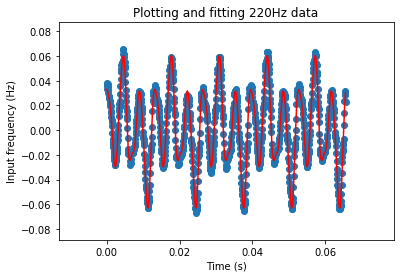

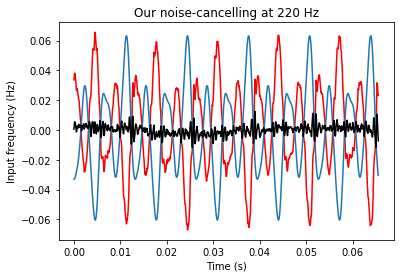

the parameters are:  [-2.25779796e-05  4.73790707e-04 -1.77570235e-03 -3.66203692e-03
  1.26109077e-04 -2.01571507e-04 -2.72118662e-04 -1.11982106e-04
 -1.59304181e-04  2.68955693e-05 -1.05329220e-03  1.08510740e+03
  3.24138036e-04 -9.11594358e-03  1.92518783e-04 -2.77011949e-04
 -6.04970882e-04  2.88424778e-04]


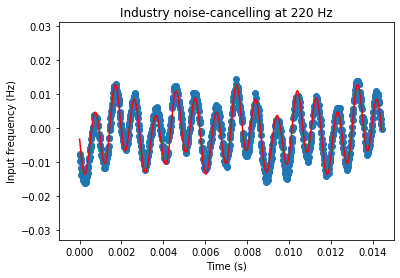

Text(0.5, 1.0, 'Comparison: our residuals vs industry residuals at 220 Hz')

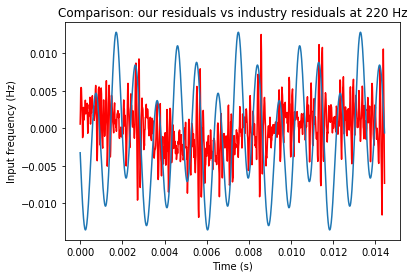

In [111]:
# plotting and fitting 220 Hz without cancellation data
guess = 450
left_x, left_headphone, right_x, right_headphone = read_data("220Hz-nonNC.csv")
plt.scatter(left_x, left_headphone)
headphone_fit = fit(left_x, left_headphone, guess)
plt.plot(left_x, headphone_fit, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Plotting and fitting 220Hz data")
plt.show()

#cancelling 220 Hz data
negated_fit = headphone_fit * -1
plt.plot(left_x, left_headphone, c = 'r')
plt.plot(left_x, negated_fit)
residuals_200 = left_headphone + negated_fit
plt.plot(left_x, residuals_200, c = 'black')
#fit_residuals = fit(linspace(0, ), residuals)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Our noise-cancelling at 220 Hz")
plt.show()

# fit to find residuals for industry-grade noise-cancelling at 220 Hz
guess = 1085
left_x, left_headphone, right_x, right_headphone = read_data("220Hz-NC.csv")
plt.scatter(left_x, left_headphone)
industry_residuals_200 = fit(left_x, left_headphone, guess)
plt.plot(left_x, industry_residuals_200, c = "r")
plt.xlim(-0.001, 0.015)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Industry noise-cancelling at 220 Hz")
plt.show()

# compare own residuals to industry residuals at 220 Hz (ours are red theirs are blue)
plt.plot(left_x, residuals_200, c = 'r')
plt.plot(left_x, industry_residuals_200)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Comparison: our residuals vs industry residuals at 220 Hz")
# looks like ours is a little more noisy but on the same magnitude?? which is insane to me



the parameters are:  [ 2.30775155e-01 -2.14594566e-01 -3.81457346e-03  4.49861638e-03
 -2.23952396e-02  4.30045706e-03  7.95545613e-03 -1.35380797e-03
 -3.37003010e-03  1.53582351e-02  1.70726704e-03  3.70027947e+02
  1.13910837e-03 -2.14447107e-03 -1.00624389e-03  4.40362144e-04
 -1.15755979e-03 -5.84750769e-04]


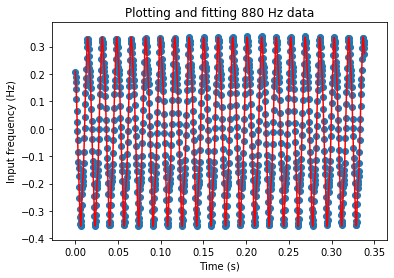

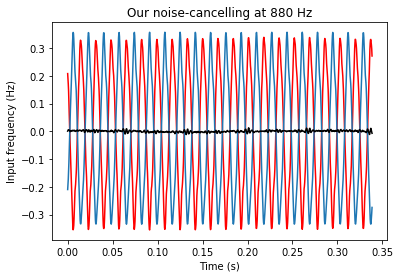

the parameters are:  [-3.51287410e-04 -6.19248990e-04 -1.41934678e-04 -2.36166770e-04
  1.45989917e-05 -1.62522391e-04  1.53775351e-04  7.94830923e-05
  4.40195247e-02  1.11474810e-01  1.79581388e-03  2.00778121e+02
  1.50510433e-05 -1.23481497e-04  1.10755466e-05 -4.74507766e-05
  6.73969753e-06 -1.06851055e-04]


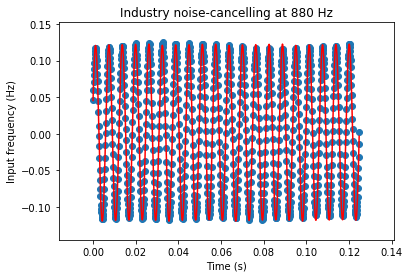

Text(0.5, 1.0, 'Comparison: our residuals vs industry residuals at 880 Hz')

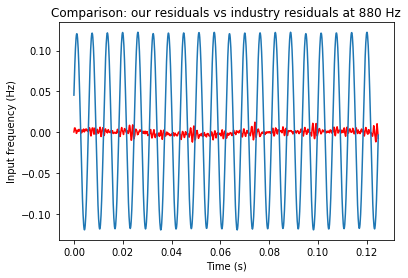

In [137]:
# plotting and fitting 880 Hz without cancellation data
guess = 370
left_x, left_headphone, right_x, right_headphone = read_data("880Hz-nonNC.csv")
plt.scatter(left_x, left_headphone)
headphone_fit = fit(left_x, left_headphone, guess)
plt.plot(left_x, headphone_fit, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Plotting and fitting 880 Hz data")
plt.show()

#cancelling 880 Hz data
negated_fit = headphone_fit * -1
plt.plot(left_x, left_headphone, c = 'r')
plt.plot(left_x, negated_fit)
residuals_880 = left_headphone + negated_fit
plt.plot(left_x, residuals_200, c = 'black')
#fit_residuals = fit(linspace(0, ), residuals)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Our noise-cancelling at 880 Hz")
plt.show()

# fit to find residuals for industry-grade noise-cancelling at 880 Hz
guess = 200
left_x, left_headphone, right_x, right_headphone = read_data("880Hz-NC.csv")
plt.scatter(left_x, left_headphone)
industry_residuals_880 = fit(left_x, left_headphone, guess)
plt.plot(left_x, industry_residuals_880, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Industry noise-cancelling at 880 Hz")
plt.show()

# compare own residuals to industry residuals at 880 Hz (ours are red theirs are blue)
plt.plot(left_x, residuals_200, c = 'r')
plt.plot(left_x, industry_residuals_880)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Comparison: our residuals vs industry residuals at 880 Hz")
# looks like ours is a little more noisy but on the same magnitude?? which is insane to me




In [266]:
def model_var(t, A, B, C, D, E, F, G, H, I, J, K, w, L, M, N, O, P, Q, R):
    return (A*np.cos(w*t) + B*np.sin(w*t) + C*np.cos(2*w*t) + D*np.sin(2*w*t)+ E*np.cos(3*w*t) + F*np.sin(3*w*t) + G*np.cos(4*w*t) + H*np.sin(4*w*t) + I*np.cos(5*w*t) + J*np.sin(5*w*t) + K + L*np.cos(6*w*t) + M*np.sin(6*w*t) + N*np.cos(7*w*t) + O*np.sin(7*w*t) + P*np.cos(8*w*t) + Q*np.sin(8*w*t) + R)

def fit_var(x, y, w_guess):
    par0 = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, w_guess, 1, 1, 1, 1, 1, 1, 0.002973]#[-0.002381, -7.743e-05, -0.0006767, -0.0002646, 2.315e-06, 4.807e-05, -7.191e-05, -5.347e-05, 8.889e-05, 0.0001304, 0.002973, 296.1, -4.819e-05, -6.012e-05, 0.01541, -0.0164, -8.66e-05, 0.0001719]
    par,cov= optimize.curve_fit(model_var, x, y, p0 = par0, maxfev = 10000000) 
    A, B, C, D, E, F, G, H, I, J, K, w, L, M, N, O, P, Q = par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8], par[9], par[10], par[11], par[12], par[13], par[14], par[15], par[16], par[17]
    fit = model_var(x, A, B, C, D, E, F, G, H, I, J, K, w, L, M, N, O, P, Q)
    print("the parameters are: ", par)
    return fit

the parameters are:  [ 3.06081907e-03  3.79407681e-03  1.62429387e-04 -1.77376525e-04
 -1.16997428e-02  2.18231584e-03 -1.48974656e-02 -1.18498706e-02
  6.22653616e-04 -4.08451582e-04 -2.50017100e-03  3.68961843e+02
 -3.51087819e-02 -1.78418668e-02 -8.02768050e-03  6.75138528e-03
 -6.13110020e-03  1.21766468e-03]


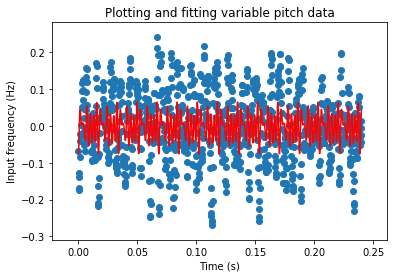

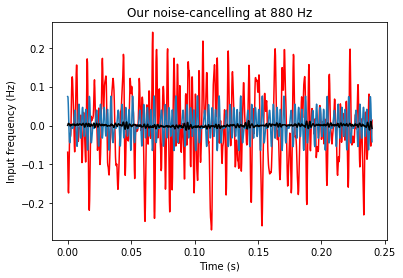

the parameters are:  [-1.98806771e-03 -1.05861857e-03  3.31686125e-04 -8.46099532e-04
  5.87620431e-04  5.68282435e-04  5.30960059e-04 -6.00043679e-04
  4.75563775e-04  7.00612385e-04  9.60096756e-04  2.15637706e+02
  1.29100283e-03 -3.91241063e-04  1.04284827e-02 -5.00927525e-03
 -2.08698902e-03  1.86682199e-02]


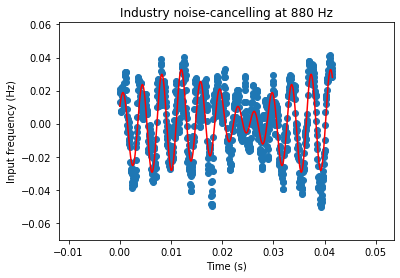

Text(0.5, 1.0, 'Comparison: our residuals vs industry residuals at 880 Hz')

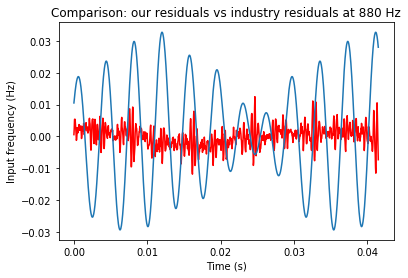

In [267]:
# plotting and fitting variable pitch without cancellation data
guess = 370
left_x, left_headphone, right_x, right_headphone = read_data("VarPitch-NonNC.csv")
plt.scatter(left_x, left_headphone)
headphone_fit = fit(left_x, left_headphone, guess)
plt.plot(left_x, headphone_fit, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Plotting and fitting variable pitch data")
plt.show()

#cancelling variable pitch Hz data
negated_fit = headphone_fit * -1
plt.plot(left_x, left_headphone, c = 'r')
plt.plot(left_x, negated_fit)
residuals_880 = left_headphone + negated_fit
plt.plot(left_x, residuals_200, c = 'black')
#fit_residuals = fit(linspace(0, ), residuals)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Our noise-cancelling at 880 Hz")
plt.show()

# fit to find residuals for industry-grade noise-cancelling at 220 Hz
guess = 200
left_x, left_headphone, right_x, right_headphone = read_data("VarPitch-NC.csv")
plt.scatter(left_x, left_headphone)
industry_residuals_880 = fit(left_x, left_headphone, guess)
plt.plot(left_x, industry_residuals_880, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Industry noise-cancelling at 880 Hz")
plt.show()

# compare own residuals to industry residuals at 220 Hz (ours are red theirs are blue)
plt.plot(left_x, residuals_200, c = 'r')
plt.plot(left_x, industry_residuals_880)
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Comparison: our residuals vs industry residuals at 880 Hz")
# looks like ours is a little more noisy but on the same magnitude?? which is insane to me


the parameters are:  [ 2.43168646e-03 -3.52934332e-04 -4.29315396e-03  2.64114763e-03
  5.36787385e-04  5.32144759e-03 -1.82912395e-04  8.22101739e-04
 -8.26658979e-05  2.25939319e-03  9.00512834e-04  1.04011490e+03
  4.75119044e-04 -3.69225897e-04  5.62759408e-05  2.42184339e-05
 -2.46917121e-04 -1.02276205e-03]


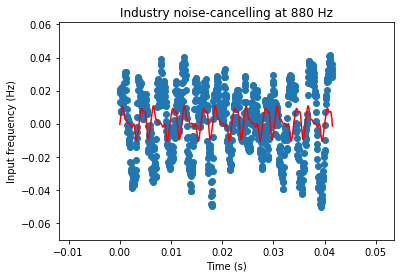

In [268]:
guess = 1000
left_x, left_headphone, right_x, right_headphone = read_data("VarPitch-NC.csv")
plt.scatter(left_x, left_headphone)
industry_residuals_880 = fit(left_x, left_headphone, guess)
plt.plot(left_x, industry_residuals_880, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
plt.title("Industry noise-cancelling at 880 Hz")
plt.show()


In [283]:
def model_var(t, A, B, C, D, E, F, G, H, I, J, w, L, M, N, O, P, Q, R):
    return (A*np.cos(w*t) + B*np.sin(w*t) + C*np.cos(2*w*t) + D*np.sin(2*w*t)+ E*np.cos(3*w*t) + F*np.sin(3*w*t) + G*np.cos(4*w*t) + H*np.sin(4*w*t) + I*np.cos(5*w*t) + J*np.sin(5*w*t) + L*np.cos(6*w*t) + M*np.sin(6*w*t) + N*np.cos(7*w*t) + O*np.sin(7*w*t) + P*np.cos(8*w*t) + Q*np.sin(8*w*t) + R)

def fit_var(x, y, w_guess):
    par0 = [-0.002381, -7.743e-05, -0.0006767, -0.0002646, 2.315e-06, 4.807e-05, -7.191e-05, -5.347e-05, 8.889e-05, 0.0001304, w_guess, -4.819e-05, -6.012e-05, 0.01541, -0.0164, -8.66e-05, 0.0001719, 0.002973]#[-0.002381, -7.743e-05, -0.0006767, -0.0002646, 2.315e-06, 4.807e-05, -7.191e-05, -5.347e-05, 8.889e-05, 0.0001304, 0.002973, 296.1, -4.819e-05, -6.012e-05, 0.01541, -0.0164, -8.66e-05, 0.0001719]
    par,cov= optimize.curve_fit(model_var, x, y, p0 = par0, maxfev = 10000000) 
    A, B, C, D, E, F, G, H, I, J, w, L, M, N, O, P, Q, R = par[0], par[1], par[2], par[3], par[4], par[5], par[6], par[7], par[8], par[9], par[10], par[11], par[12], par[13], par[14], par[15], par[16], par[17]
   # fit = model_var(x, A, B, C, D, E, F, G, H, I, J, w, L, M, N, O, P, Q, R)
    fit = model_var(x, -0.002381, -7.743e-05, -0.0006767, -0.0002646, 2.315e-06, 4.807e-05, -7.191e-05, -5.347e-05, 8.889e-05, 0.0001304, w_guess, -4.819e-05, -6.012e-05, 0.01541, -0.0164, -8.66e-05, 0.0001719, 0.002973)
    print("the parameters are: ", par)
    return fit

the parameters are:  [ 1.24542378e-03  4.02017403e-03  1.45744440e-02  9.09022582e-03
  3.69720291e-02  1.46828746e-02 -4.10083367e-03 -1.60983001e-02
 -1.58702308e-02 -8.21950538e-03  2.94804412e+02 -2.27180020e-03
  1.42178306e-03  4.76426804e-03  1.07767172e-03 -5.69046140e-04
  4.94671628e-03 -2.66200194e-03]


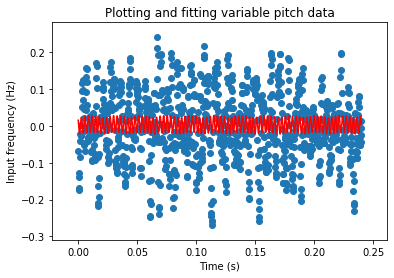

In [286]:
guess = 296.1
left_x, left_headphone, right_x, right_headphone = read_data("VarPitch-NonNC.csv")
plt.scatter(left_x, left_headphone)
headphone_fit = fit_var(left_x, left_headphone, guess)
fit = model_var(left_x, -0.002381, -7.743e-05, -0.0006767, -0.0002646, 2.315e-06, 4.807e-05, -7.191e-05, -5.347e-05, 8.889e-05, 0.0001304, guess, -4.819e-05, -6.012e-05, 0.01541, -0.0164, -8.66e-05, 0.0001719, 0.002973)
plt.plot(left_x, fit, c = "r")
plt.xlabel("Time (s)")
plt.ylabel("Input frequency (Hz)")
#plt.ylim(-0.02, 0.03)
plt.title("Plotting and fitting variable pitch data")
plt.show()